In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df=pd.read_csv("/content/circket.csv",encoding="latin",skipinitialspace=True)

In [59]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


for clustering,data must be numerical

In [61]:
#divide the data of span column into two column ie start or end based on hypen
df[["start","end"]]=df["Span"].str.split("-",expand=True)

In [62]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,1975,1991
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,2002,2015
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,2001,2011
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009


In [63]:
df.columns

Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR',
       '100', '50', '0', 'start', 'end'],
      dtype='object')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  start   79 non-null     object 
 14  end     79 non-null     object 
dtypes: float64(2), int64(8), object(5)
memory usage: 9.4+ KB


In [65]:
df["start"]=df["start"].astype(int)
df["end"]=df["end"].astype(int)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  start   79 non-null     int64  
 14  end     79 non-null     int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 9.4+ KB


In [67]:
#create another new colun called experience
df["experience"]=df["end"]-df["start"]

In [68]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end,experience
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,1975,1991,16
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,2002,2015,13
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,2001,2011,10
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009,11


In [69]:
#since we have experience column,we dont need span,start and end so we drop them
df.drop(columns=["Span","start","end"],axis=1,inplace=True)

In [70]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133*,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96*,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120*,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      79 non-null     object 
 1   Mat         79 non-null     int64  
 2   Inns        79 non-null     int64  
 3   NO          79 non-null     int64  
 4   Runs        79 non-null     int64  
 5   HS          79 non-null     object 
 6   Ave         79 non-null     float64
 7   BF          79 non-null     int64  
 8   SR          79 non-null     float64
 9   100         79 non-null     int64  
 10  50          79 non-null     int64  
 11  0           79 non-null     int64  
 12  experience  79 non-null     int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 8.1+ KB


In [72]:
#in HS column we have *for not out, we need to replace "*"" by ""
df["HS"]=df["HS"].str.replace("*","")

In [73]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [74]:
df["HS"]=df["HS"].astype(int)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      79 non-null     object 
 1   Mat         79 non-null     int64  
 2   Inns        79 non-null     int64  
 3   NO          79 non-null     int64  
 4   Runs        79 non-null     int64  
 5   HS          79 non-null     int64  
 6   Ave         79 non-null     float64
 7   BF          79 non-null     int64  
 8   SR          79 non-null     float64
 9   100         79 non-null     int64  
 10  50          79 non-null     int64  
 11  0           79 non-null     int64  
 12  experience  79 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 8.1+ KB


In [76]:
df.isnull().sum()

,0
Player,0
Mat,0
Inns,0
NO,0
Runs,0
HS,0
Ave,0
BF,0
SR,0
100,0


In [77]:
df.duplicated().sum()

0

In [78]:
#drop duplicate,if any

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      79 non-null     object 
 1   Mat         79 non-null     int64  
 2   Inns        79 non-null     int64  
 3   NO          79 non-null     int64  
 4   Runs        79 non-null     int64  
 5   HS          79 non-null     int64  
 6   Ave         79 non-null     float64
 7   BF          79 non-null     int64  
 8   SR          79 non-null     float64
 9   100         79 non-null     int64  
 10  50          79 non-null     int64  
 11  0           79 non-null     int64  
 12  experience  79 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 8.1+ KB


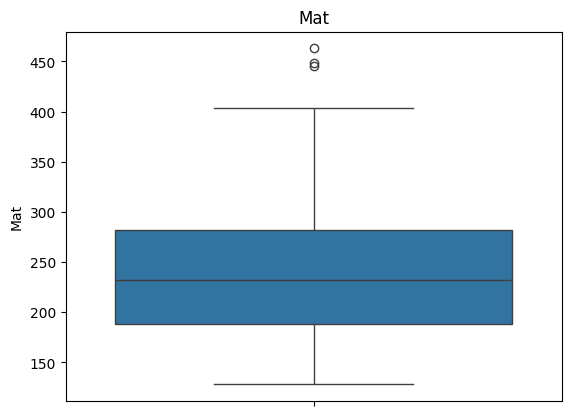

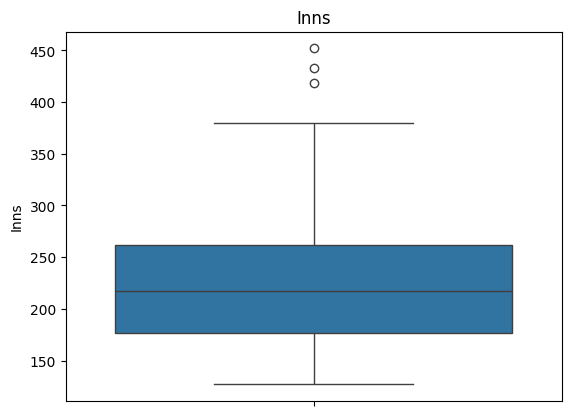

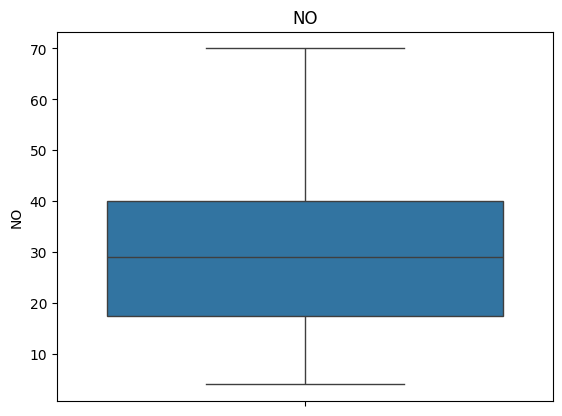

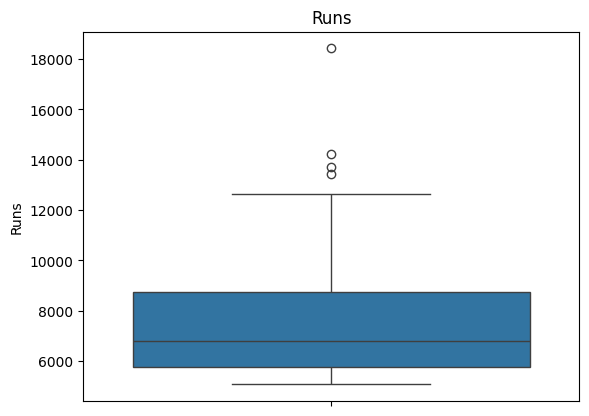

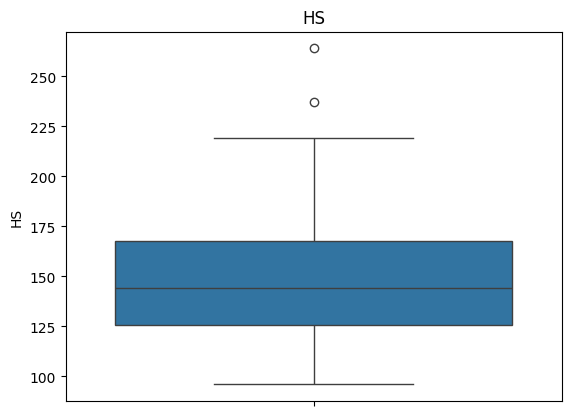

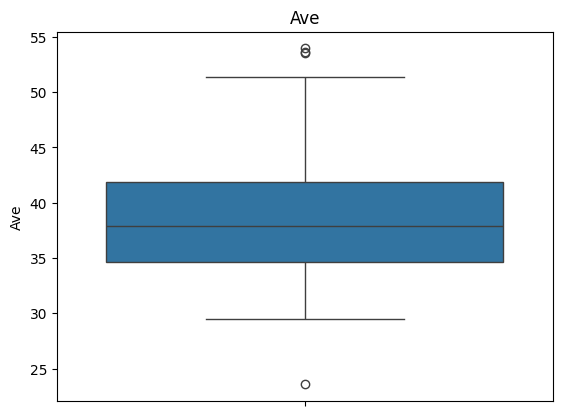

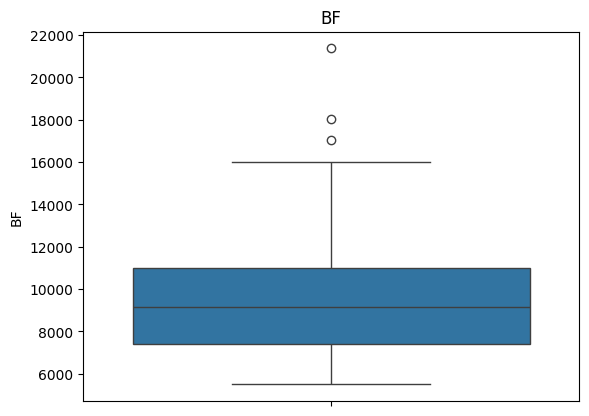

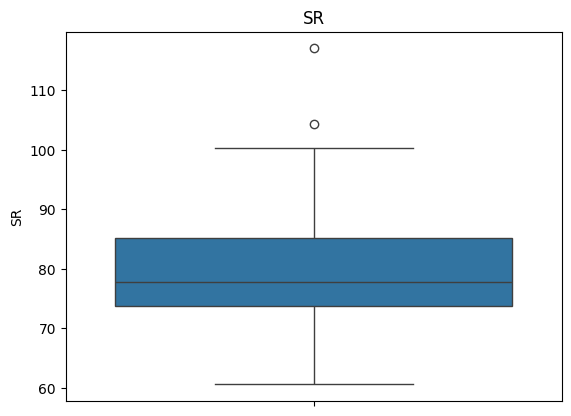

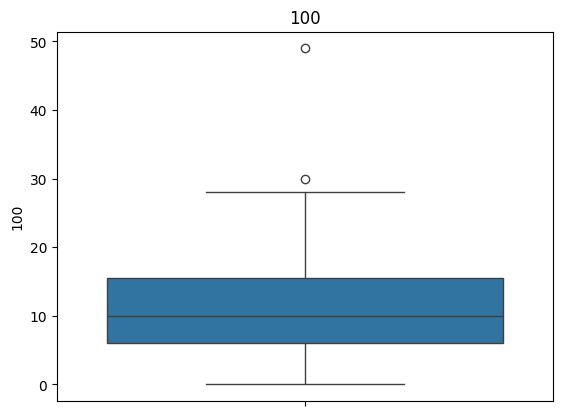

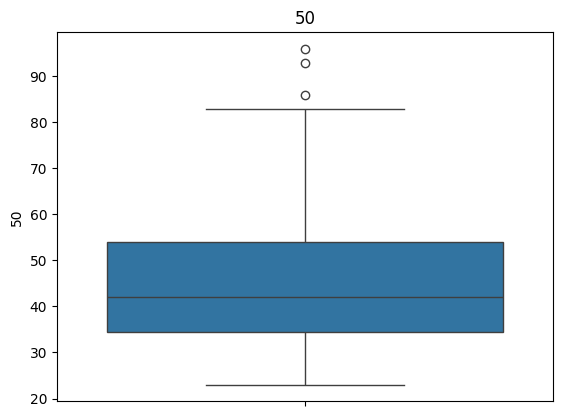

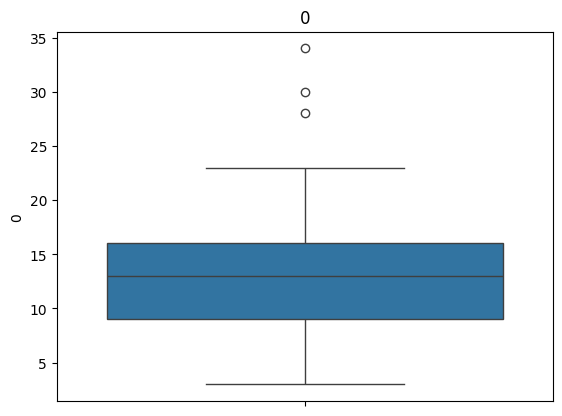

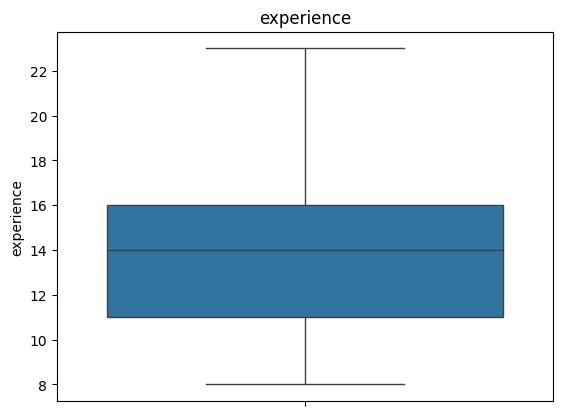

In [80]:
for i in df.columns:
  if df[i].dtype!="object":
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [81]:
#since we dont need player col,so create copy of df and remove player col
df_copy=df.copy()

In [82]:
df_copy.drop(["Player"],axis=1,inplace=True)

In [83]:
df_copy

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...
74,128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [84]:
#standarization-each value in the data set is adjusted by subtracting to mean and then dividing by st dev
#--balancing data
from sklearn.preprocessing import StandardScaler
se=StandardScaler()


In [85]:
df_scaled=se.fit_transform(df_copy)
df_scaled

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [87]:
df_scaled=pd.DataFrame(df_scaled,columns=df_copy.columns)
#creatig dataframe from standard values
df_scaled #new df is scaled version od df_copy

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900
...,...,...,...,...,...,...,...,...,...,...,...,...
74,-1.587674,-1.481860,-1.188961,-0.979677,-0.522838,1.106299,-0.559768,-1.457604,-0.069268,-0.950465,-1.741328,0.684919
75,-1.126598,-1.167010,0.067133,-0.984410,-1.713068,0.829159,-0.863213,-0.562275,-1.437319,-0.273453,-1.231828,-0.227024
76,-0.651961,-0.709047,0.485831,-0.996241,-0.941027,-0.537836,-0.967512,-0.234765,-0.815478,-1.258197,-1.061995,-1.138967
77,-0.638400,-0.995274,0.206699,-0.997819,0.217035,0.208570,-1.317278,1.332823,-0.691110,-1.012011,0.296671,-0.834986


In [88]:
""" how to choose no of cluster?
howerver choosing k mights be tricky???
if u choose too few cluster then u miss some imp patterns in data
if u choose too many cluster then model might be complex and overfit the data
"""
print()

In [95]:
from sklearn.cluster import KMeans

In [90]:
k_val=[2,3,4,5,6,7]

In [91]:
ssd=[]
for k in k_val:
  km=KMeans(n_clusters=k,max_iter=150,random_state=32)
  km.fit(df_scaled)
  ssd.append(km.inertia_)

In [92]:
ssd

[649.8691266392077,
 531.9935569622713,
 463.3893496958491,
 424.47610926753106,
 397.7432469298372,
 362.3872091147913]

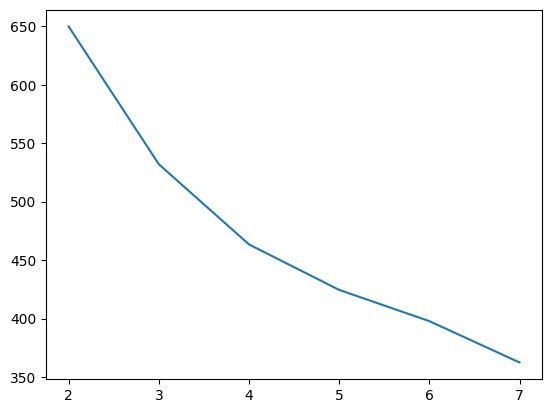

In [93]:
plt.plot(k_val,ssd)

In [ ]:
#4 is noof cluster as 4 has sharper bend

In [98]:
#lets build model
km=KMeans(n_clusters=4,max_iter=150,random_state=32)
km.fit(df_scaled)

KMeans(max_iter=150, n_clusters=4, random_state=32)

In [100]:
print(km.labels_) #This will assign each datapoint into diff clusters we have created

[2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 3 1 0
 0 0 3 0 1 3 1 0 0 0 0 0 3 1 0 0 0 0 0 0 0 0 3 0 0 0 3 0 3 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [101]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [103]:
df["cluster_id"]=km.labels_
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience,cluster_id
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,2
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,2
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,2
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,2
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16,0
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13,0
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10,0
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11,0


In [104]:
df["cluster_id"].T

,cluster_id
0,2
1,2
2,2
3,2
4,2
...,...
74,0
75,0
76,0
77,0


In [105]:
g1=df[df["cluster_id"]==1]
g1

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience,cluster_id
9,BC Lara (ICC/WI),299,289,32,10405,169,40.48,13086,79.51,19,63,16,17,1
10,TM Dilshan (SL),330,303,41,10290,161,39.27,11933,86.23,22,47,11,17,1
11,Mohammad Yousuf (Asia/PAK),288,273,40,9720,141,41.71,12942,75.10,15,64,15,12,1
12,AC Gilchrist (AUS/ICC),287,279,11,9619,172,35.89,9922,96.94,16,55,19,12,1
13,MS Dhoni (Asia/INDIA),295,255,70,9496,183,51.32,10706,88.69,10,64,8,13,1
14,M Azharuddin (INDIA),334,308,54,9378,153,36.92,12669,74.02,7,58,9,15,1
16,PA de Silva (SL),308,296,30,9284,145,34.90,11443,81.13,11,64,17,19,1
17,CH Gayle (ICC/WI),269,264,17,9221,215,37.33,10834,85.11,22,47,23,16,1
18,Saeed Anwar (PAK),247,244,19,8824,194,39.21,10938,80.67,20,43,15,14,1
19,S Chanderpaul (WI),268,251,40,8778,150,41.60,12408,70.74,11,59,6,17,1
